<a href="https://colab.research.google.com/github/mqquiroz/ICV513/blob/main/Espectro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math

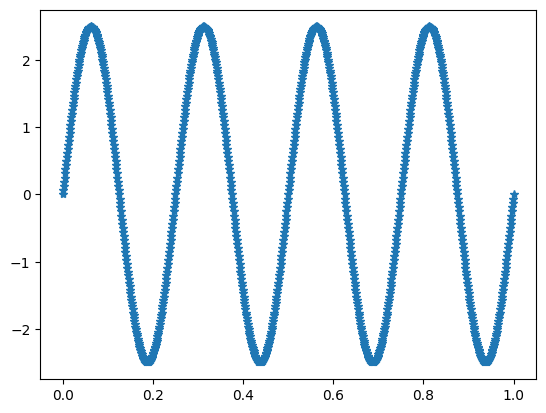

In [56]:
#Entradas
a = 2.5 #(m)
T = 0.25 #(s)
#nos damos una resolucion temporal (intervalo de tiempo)
dt = 0.001 #(s) 
T0 = 1000*dt  #(s)

t = np.arange(0,T0+dt,dt)
w = 2*np.pi/T
eta = a*np.sin(w*t)

plt.plot(t,eta,'-*')
plt.show()

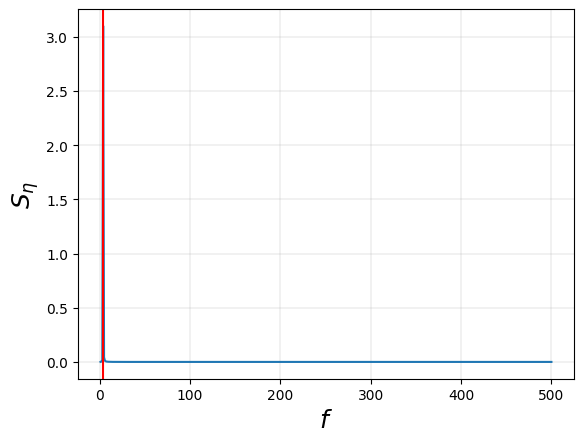

In [57]:
#Podemos, entonces calcular df y F_N
def potencia2(x):
  return math.ceil(np.log2(abs(x)))

#frecuencia de muestreo
Fs = 1/dt #(1/s = Hz)
letra = 18

df = 1/T0  #(Hz)
FN = Fs/2 #(Hz)

#Numero de puntos de FFT
NFFT = 2**potencia2(len(eta))

mitad = int(NFFT/2+1)

coefs = np.fft.fft(eta,NFFT)
amplitude = (2/len(eta))*abs(coefs[1:mitad])

Sn = 0.5*(amplitude**2)/df

#Construccion vector f
f = FN*np.linspace(0,1,mitad)
f = f[1::]

#deltasf = np.arange(df,FN+df,df+df)
#print(np.shape(deltasf))

#print(np.shape(Sn[1:]))
plt.plot(f,Sn)
plt.axvline(x = 1/T,c='r')
plt.ylabel('$S_{\eta}$', fontsize = letra)
plt.xlabel('$f$', fontsize = letra)
plt.grid(linewidth = 0.25)
plt.show()


In [58]:
#Maximo valor del espectro
Snmax = np.max(Sn)

#Amplitud desd el espectro
amp = np.sqrt(2*Snmax*df)

print(amp)

2.4907335990842583


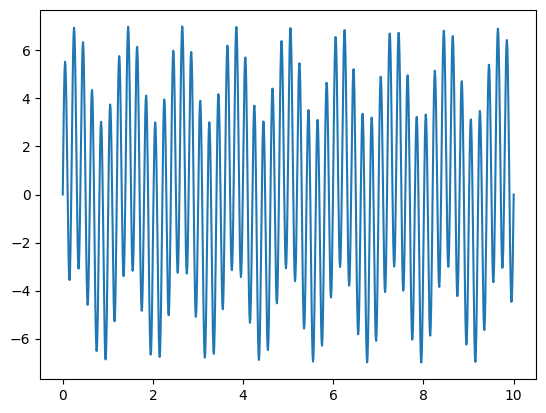

In [76]:
a1 = 5 #(m)
a2 = 2 #(m)
f1 = 5 #(Hz)
f2 = 0.85 #(Hz)
dt = 0.01 #(s) 
T0 = 1000*dt  #(s)



t = np.arange(0,T0+dt,dt)
w1 = 2*np.pi*f1
w2 = 2*np.pi*f2
eta1 = a1*np.sin(w1*t)
eta2 = a2*np.sin(w2*t)

eta = eta1 + eta2

plt.plot(t, eta)
plt.show()

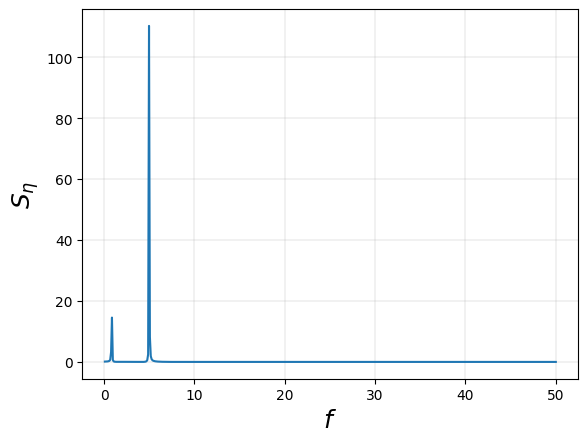

In [77]:
#frecuencia de muestreo
Fs = 1/dt #(1/s = Hz)
letra = 18

df = 1/T0  #(Hz)
FN = Fs/2 #(Hz)

#Numero de puntos de FFT
NFFT = 2**potencia2(len(eta))

mitad = int(NFFT/2+1)

coefs = np.fft.fft(eta,NFFT)
amplitude = (2/len(eta))*abs(coefs[1:mitad])

Sn = 0.5*(amplitude**2)/df

#Construccion vector f
f = FN*np.linspace(0,1,mitad)
f = f[1::]

plt.plot(f,Sn)
#plt.axvline(x = 1/T,c='r')
plt.ylabel('$S_{\eta}$', fontsize = letra)
plt.xlabel('$f$', fontsize = letra)
plt.grid(linewidth = 0.25)
plt.show()

In [79]:
print(np.sqrt(2*np.max(Sn)*df))

4.696291151130617
